In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
import matplotlib.pyplot as plt
from ml_utilities.torch_models.fc import FC
from erank.utils import load_model_from_idx, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
from erank.analyses import create_model_erank_df

gpu_id = 0

## Erank plots

### Create model dict

In [2]:
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.6.0-conv4_rotatedtasks--221015_124319'
sweep_output_path = Path(sweep_dir) / 'outputs'
num_vectors = -1

In [3]:
# check for missing best_epoch_files
# sweep_output_path = sweep_conv4
for p in sweep_output_path.iterdir():
    bepf = p / 'best_step.txt'
    if not bepf.exists():
        print(str(p))

In [4]:
pretrain_variations = {
    'pretrain_steps_0': '*init_model_step-0-*',
    'pretrain_steps_5': '*init_model_step-5-*',
    'pretrain_steps_10': '*init_model_step-10-*',
    'pretrain_steps_15': '*init_model_step-15-*',
    'pretrain_steps_20': '*init_model_step-20-*',
    'pretrain_steps_50': '*init_model_step-50-*',
    'pretrain_steps_100': '*init_model_step-100-*',
}


In [5]:
len(pretrain_variations)

7

In [7]:
# load a model
run = next(iter(sweep_output_path.iterdir()))
init_model = load_model_from_idx(run, idx=0, device='cpu')

In [7]:
# load model matrices
model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
                                                   name_run_glob_pattern_dict=pretrain_variations,
                                                   num_runs=num_vectors,
                                                   device='cpu')
with open(Path('./../tmp/erank_plots/') / f'model_dict_mnist_rotated_tasks_conv4_num_vecs{num_vectors}.p', 'wb') as savefile:
    pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOCOL)

Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.6.0-conv4_rotatedtasks--221015_124319/outputs/mnist-11.6.0-conv4_rotatedtasks--init_model_step-0-rotation_angle-99.77715877437325-seed-0--221015_170714: 100%|██████████| 360/360 [00:26<00:00, 13.50it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.6.0-conv4_rotatedtasks--221015_124319/outputs/mnist-11.6.0-conv4_rotatedtasks--init_model_step-5-rotation_angle-99.77715877437325-seed-0--221015_125509: 100%|██████████| 360/360 [00:35<00:00, 10.03it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.6.0-conv4_rotatedtasks--221015_124319/outputs/mnist-11.6.0-conv4_rotatedtasks--init_model_step-10-rotation_angle-99.77715877437325-seed-0--221015_135257: 100%|██████████| 360/360 [00:50<00:00,  7.15it/s] 
Loading /system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.6.0-conv4_rotatedtasks--221015_124319/outputs/mnist-11.6.0-conv4_ro

### Load model dict

In [3]:
model_dict_path = f'./../tmp/erank_plots/model_dict_mnist_rotated_tasks_conv4_num_vecs{num_vectors}.p'
model_dict_path = Path(model_dict_path)
# init_model_path = './../tmp/erank_plots/init_model.p'
# init_model_path = Path(init_model_path)

In [9]:
# load init model
# init_model = FC.load(init_model_path, device=gpu_id)
# init_model, init_model.device

(FC(
   (fc): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=1, out_features=40, bias=True)
     (2): ReLU(inplace=True)
     (3): Linear(in_features=40, out_features=40, bias=True)
     (4): ReLU(inplace=True)
     (5): Linear(in_features=40, out_features=1, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [4]:
# unpickle model dict
with open(model_dict_path, 'rb') as loadfile:
    model_dict = pickle.load(loadfile)

In [5]:
list(model_dict.keys()), type(model_dict)

(['pretrain_steps_0#*init_model_step-0-*',
  'pretrain_steps_5#*init_model_step-5-*',
  'pretrain_steps_10#*init_model_step-10-*',
  'pretrain_steps_15#*init_model_step-15-*',
  'pretrain_steps_20#*init_model_step-20-*',
  'pretrain_steps_50#*init_model_step-50-*',
  'pretrain_steps_100#*init_model_step-100-*'],
 dict)

### Generate erank plot

In [8]:
erank_df = create_model_erank_df(models=model_dict, random_init_model=init_model, device=gpu_id)

Calculate eranks: 100%|██████████| 37/37 [00:10<00:00,  3.37it/s]


In [14]:
# erank_df.to_pickle('./erank_df.p')

In [15]:
erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [23]:
# column_name_to_plot_kwargs = {'almost_point#*ampl-1.0_1.1-ph-0_0.1*': {'label': 'Very narrow', 'color':'#ffa600'},
#                               'narrow#*ampl-0.1_2.5-ph-0_1.5*': {'label': 'Narrow', 'color':'#ff6e54'}, 
#                               'normal#*ampl-0.1_5.0-ph-0_3.141592654*': {'label': 'Regular', 'color':'#dd5182'}, 
#                               'wide#*ampl-0.1_10.0-ph-0_3.141592654*': {'label': 'Wide', 'color':'#955196'}, 
#                               'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
#                               'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
#                               }

In [10]:
column_name_to_plot_kwargs = {}

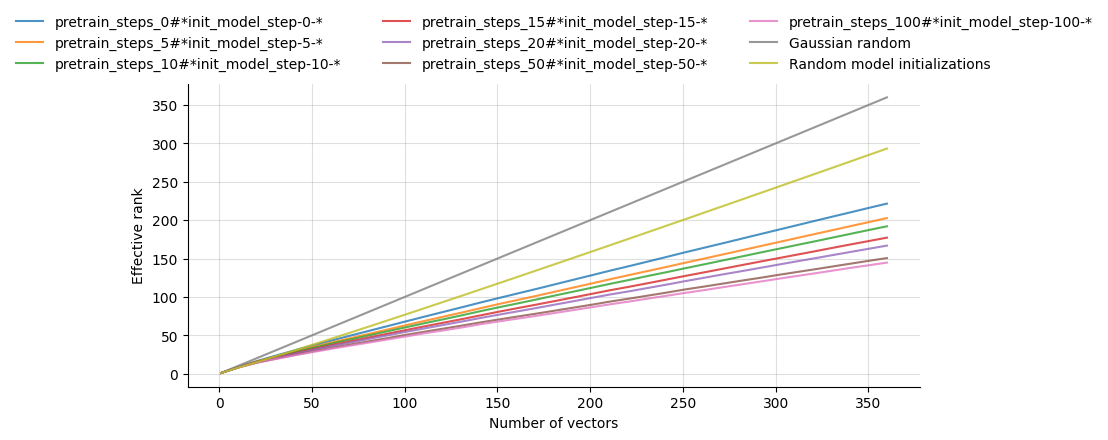

In [11]:
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [12]:
fig.savefig(f'11_6_mnist_conv4_rotatedtasks_erankplot.pdf', bbox_inches='tight')

In [53]:
fig.savefig(f'11_6_mnist_conv4_rotatedtasks_erankplot.png', dpi=300, bbox_inches='tight')